# Wave 2D
Numerical Method - Spectral Solver using FFT. <br>
Code taken from [this tutorial](http://people.bu.edu/andasari/courses/numericalpython/Week12Lecture21/Spectral_wave2.py) and more details [here.](http://people.bu.edu/andasari/courses/numericalpython/python.html <br>
```
u_tt = u_xx + u_yy on [-1,1] x [-1,1] 
```

Dirichlet Boundary Conditions : 
```
u=0
```

Initial Distribution :
```
 u(x,y,t=0) = exp(-40(x-4)^2 + y^2)
 ```

Initial Velocity Condition : 
```
u_t(x,y,t=0) = 0
```


In [1]:
"""
2D wave equation via FFT 

u_tt = u_xx + u_yy 

on [-1, 1]x[-1, 1], t > 0 and Dirichlet BC u=0
"""


'\n2D wave equation via FFT \n\nu_tt = u_xx + u_yy \n\non [-1, 1]x[-1, 1], t > 0 and Dirichlet BC u=0\n'

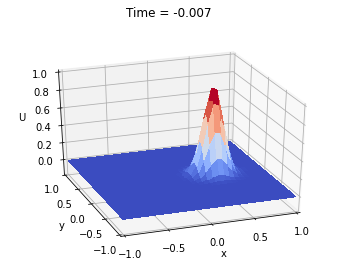

In [2]:
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


class WaveEquation:
    
    def __init__(self, N):
        self.N = N
        self.x0 = -1.0
        self.xf = 1.0
        self.y0 = -1.0
        self.yf = 1.0
        self.initialization()
        self.initCond()
        
        
    def initialization(self):
        k = np.arange(self.N + 1)
        self.x = np.cos(k*np.pi/self.N)
        self.y = self.x.copy()
        self.xx, self.yy = np.meshgrid(self.x, self.y)
        
        self.dt = 6/self.N**2
        self.plotgap = round((1/3)/self.dt)
        self.dt = (1/3)/self.plotgap
        
        
    def initCond(self):
        self.vv = np.exp(-40*((self.xx-0.4)**2 + self.yy**2))
        self.vvold = self.vv.copy()
        
        
    def solve_and_animate(self):
        
        u_list = []
        fig = plt.figure()
        
        ax = fig.add_subplot(111, projection='3d')
        
        tc = 0
        nstep = round(3*self.plotgap+1)
        wframe = None
        
        while tc < nstep:
            if wframe:
                ax.collections.remove(wframe)
                
            xxx = np.arange(self.x0, self.xf+1/16, 1/16)
            yyy = np.arange(self.y0, self.yf+1/16, 1/16)
            vvv = interpolate.interp2d(self.x, self.y, self.vv, kind='cubic')
            Z = vvv(xxx, yyy)
            
            xxf, yyf = np.meshgrid(np.arange(self.x0,self.xf+1/16,1/16), np.arange(self.y0,self.yf+1/16,1/16))
                
            wframe = ax.plot_surface(xxf, yyf, Z, cmap=cm.coolwarm, linewidth=0, 
                    antialiased=False)
            
            ax.set_xlim3d(self.x0, self.xf)
            ax.set_ylim3d(self.y0, self.yf)
            ax.set_zlim3d(-0.15, 1)
            
            ax.set_xlabel("x")
            ax.set_ylabel("y")
            ax.set_zlabel("U")
            
            ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
            ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
            
            fig.suptitle("Time = %1.3f" % (tc/(3*self.plotgap-1)-self.dt))
            #plt.tight_layout()
            ax.view_init(elev=30., azim=-110)
            plt.pause(0.01)
                
            uxx = np.zeros((self.N+1, self.N+1))
            uyy = np.zeros((self.N+1, self.N+1))
            ii = np.arange(1, self.N)
            
            for i in range(1, self.N):
                v = self.vv[i,:]
                V = np.hstack((v, np.flipud(v[ii])))
                U = np.fft.fft(V)
                U = U.real
                
                r1 = np.arange(self.N)
                r2 = 1j*np.hstack((r1, 0, -r1[:0:-1]))*U
                W1 = np.fft.ifft(r2)
                W1 = W1.real
                s1 = np.arange(self.N+1)
                s2 = np.hstack((s1, -s1[self.N-1:0:-1]))
                s3 = -s2**2*U
                W2 = np.fft.ifft(s3)
                W2 = W2.real
                
                uxx[i,ii] = W2[ii]/(1-self.x[ii]**2) - self.x[ii]*W1[ii]/(1-self.x[ii]**2)**(3/2)
                
            for j in range(1, self.N):
                v = self.vv[:,j]
                V = np.hstack((v, np.flipud(v[ii])))
                U = np.fft.fft(V)
                U = U.real
                
                r1 = np.arange(self.N)
                r2 = 1j*np.hstack((r1, 0, -r1[:0:-1]))*U
                W1 = np.fft.ifft(r2)
                W1 = W1.real
                s1 = np.arange(self.N+1)
                s2 = np.hstack((s1, -s1[self.N-1:0:-1]))
                s3 = -s2**2*U
                W2 = np.fft.ifft(s3)
                W2 = W2.real
                
                uyy[ii,j] = W2[ii]/(1-self.y[ii]**2) - self.y[ii]*W1[ii]/(1-self.y[ii]**2)**(3/2)
                
            vvnew = 2*self.vv - self.vvold + self.dt**2*(uxx+uyy)
            self.vvold = self.vv.copy()
            self.vv = vvnew.copy()
            tc += 1
            
            u_list.append(Z)
        return np.asarray(u_list)
        
    
def main():
    simulator = WaveEquation(30)
    u_sol = simulator.solve_and_animate()
    return u_sol

    
if __name__ == "__main__":
    u_sol = main()
    
    N = 30
    dt =  6/N**2
    k = 30 + 1
    
    lb = np.asarray([-1.0, -1.0, 0]) #[x, y, t]
    ub = np.asarray([1.0, 1.0, 1])
    
    x = np.arange(-1, 1+1/16, 1/16)
    y = x.copy()
    t = np.arange(lb[2], ub[2]+dt, dt)
    
    xx, yy = np.meshgrid(x, y)
    u_ic = np.exp(-40*((xx-0.4)**2 + yy**2))
    
    U_sol = u_sol

    grid_length = len(x)
    
    df_dict = {'x': x,
               'y': y,
               't': t,
               'lower_range': lb,
               'upper_range': ub,
               'U_sol': U_sol}
    
        

In [3]:
import os
import time
from tqdm import tqdm 
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline


!pip install pyDOE
from pyDOE import lhs
import torch
import torch.nn as nn

# %
default_device = "cuda" if torch.cuda.is_available() else "cpu"

dtype=torch.float32
torch.set_default_dtype(dtype)

def torch_tensor_grad(x, device):
    if device == 'cuda':
        x = torch.cuda.FloatTensor(x)
    else:
        x = torch.FloatTensor(x)
    x.requires_grad = True
    return x 

def torch_tensor_nograd(x, device):
    if device == 'cuda':
        x = torch.cuda.FloatTensor(x)
    else:
        x = torch.FloatTensor(x)
    x.requires_grad = False
    return x 

  Created wheel for pyDOE: filename=pyDOE-0.3.8-cp37-none-any.whl size=18178 sha256=ac8997186303122b2882891b1c1da23858763ca142ed42be0373ade826268f92
  Stored in directory: /root/.cache/pip/wheels/7c/c8/58/a6493bd415e8ba5735082b5e0c096d7c1f2933077a8ce34544
Successfully built pyDOE


In [4]:
# Setting the random seed. 
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

In [5]:
#Setting up a Resnet as the PINN. 
class Resnet(nn.Module):
    def __init__(self, in_features, out_features, num_neurons, activation=torch.sin):
        super(Resnet, self).__init__()
        
        self.in_features = in_features
        self.out_features = out_features
        self.num_neurons = num_neurons
        
        self.act_func = activation
        
        self.block1_layer1 = nn.Linear(self.in_features, self.num_neurons)
        self.block1_layer2 = nn.Linear(self.num_neurons, self.num_neurons)
        self.block1 = [self.block1_layer1, self.block1_layer2]
        
        self.block2_layer1 = nn.Linear(self.in_features + self.num_neurons, self.num_neurons)
        self.block2_layer2 = nn.Linear(self.num_neurons, self.num_neurons)
        self.block2 = [self.block2_layer1, self.block2_layer2]
        
        # self.block3_layer1 = nn.Linear(self.in_features + self.num_neurons, self.num_neurons)
        # self.block3_layer2 = nn.Linear(self.num_neurons, self.num_neurons)
        # self.block3 = [self.block3_layer1, self.block3_layer2]
        
        # self.block4_layer1 = nn.Linear(self.in_features + self.num_neurons, self.num_neurons)
        # self.block4_layer2 = nn.Linear(self.num_neurons, self.num_neurons)
        # self.block4 = [self.block4_layer1, self.block4_layer2]
        
        self.layer_after_block = nn.Linear(self.num_neurons + self.in_features, self.num_neurons)
        self.layer_output = nn.Linear(self.num_neurons, self.out_features)
        
        
    def forward(self, x):
        
        x_temp = x
        
        for dense in self.block1:
            x_temp = self.act_func(dense(x_temp))
        x_temp = torch.cat([x_temp, x], dim=-1)
        
        for dense in self.block2:
            x_temp = self.act_func(dense(x_temp))
        x_temp = torch.cat([x_temp, x], dim=-1)
        
        # for dense in self.block3:
        #    x_temp = self.act_func(dense(x_temp))           
        # x_temp = torch.cat([x_temp, x], dim=-1)
        
        # for dense in self.block4:
        #    x_temp = self.act_func(dense(x_temp))
        # x_temp = torch.cat([x_temp, x], dim=-1)
        
        x_temp = self.act_func(self.layer_after_block(x_temp))
        x_temp = self.layer_output(x_temp)
        return x_temp

#Setting up a derivative function that goes through the graph and calculates via chain rule the derivative of u wrt x 
deriv = lambda u, x: torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True, allow_unused=True)[0]


In [6]:
#Setting up an instance of the Resnet with the needed architecture. 
npde_net = Resnet(3, 1, 100)
npde_net = npde_net.to(default_device)


In [7]:
! pip install pyDOE
from pyDOE import lhs

#Specifying the Domain of Interest. 
x_range = [-1.0, 1.0]
y_range = [-1.0, 1.0]
t_range = [0.0, 1.0]
D = 1.0

lb = np.asarray([x_range[0], y_range[0], t_range[0]])
ub = np.asarray([x_range[1], y_range[1], t_range[1]])

def LHS_Sampling(N):
    return lb + (ub-lb)*lhs(3, N)


In [8]:

#Domain Loss Function - measuring the deviation from the PDE functional. 

def pde(X):

    x = X[:, 0:1]
    y = X[:, 1:2]
    t = X[:, 2:3]
    u = npde_net(torch.cat([x,y,t],1))

    u_x = deriv(u, x)
    u_xx = deriv(u_x, x)
    u_y = deriv(u, y)
    u_yy = deriv(u_y, y)
    u_t = deriv(u, t)
    u_tt = deriv(u_t, t)
    
    pde_loss = u_tt - (u_xx + u_yy)

    return pde_loss.pow(2).mean()




#Boundary Loss Function - measuring the deviation from boundary conditions for f(x_lim, y_lim, t)
def boundary(X):

    u = npde_net(X)
    bc_loss = u - 0 

    return bc_loss.pow(2).mean()

#Initial Velocity Conditions :
def initial_velocity(X):

    x = X[:, 0:1]
    y = X[:, 1:2]
    t = X[:, 2:3]
    u = npde_net(torch.cat([x,y,t],1))

    u_t = deriv(u, t)
    initial_cond_loss = u_t - 0

    return initial_cond_loss.pow(2).mean()


#Reconstruction Loss Function - measuring the deviation fromt the actual output. Used to calculate the initial loss
def reconstruction(X, Y):
    u = npde_net(X)
    recon_loss = u-Y
    return recon_loss.pow(2).mean()


In [9]:
#Normalisation Strategies
def min_max_norm(x):
    return 2*(x-np.min(x))/(np.max(x)-np.min(x)) - 1

def z_score(x):
    return (x-np.mean(x)) / np.std(x)

def identity(x):
  return x


In [10]:
#Samples taken from each region for optimisation purposes. 
N_i = 1000
N_b = 1000
N_f = 20000

In [11]:
u = np.asarray(u_sol)
X, Y = np.meshgrid(x, y)
XY_star = np.hstack((X.flatten()[:,None], Y.flatten()[:,None]))
T_star = np.expand_dims(np.repeat(t, len(XY_star)), 1)
X_star_tiled = np.tile(XY_star, (len(t), 1))

X_star = np.hstack((X_star_tiled, T_star))
u_actual = np.expand_dims(u.flatten(),1)


In [12]:
# Data for Initial Input 

X_IC = np.hstack((XY_star, np.zeros(len(XY_star)).reshape(len(XY_star), 1)))
u_IC = u[0].flatten()
u_IC = np.expand_dims(u_IC, 1)

idx = np.random.choice(X_IC.shape[0], N_i, replace=False) 
X_i = X_IC[idx]
u_i = u_IC[idx]

In [13]:
# Data for Boundary Input

X_left = LHS_Sampling(N_b)
X_left[:,0:1] = x_range[0]

X_right = LHS_Sampling(N_b)
X_right[:,0:1] = x_range[1]

X_bottom = LHS_Sampling(N_b)
X_bottom[:,1:2] = y_range[0]

X_top = LHS_Sampling(N_b)
X_top[:,1:2] = y_range[1]

X_b = np.vstack((X_right, X_top, X_left, X_bottom))
np.random.shuffle(X_b) 

In [ ]:
#Data for Domain Input
X_f = LHS_Sampling(N_f)


In [ ]:
#Converting to tensors 

X_i = torch_tensor_grad(X_i, default_device)
Y_i = torch_tensor_nograd(u_i, default_device)
X_b = torch_tensor_grad(X_b, default_device)
X_f = torch_tensor_grad(X_f, default_device)

Streaming output truncated to the last 5000 lines.
It: 15001, Init: 1.408e-04, Bound: 1.594e-04, Domain: 4.724e-04
It: 15002, Init: 1.426e-04, Bound: 1.575e-04, Domain: 4.407e-04
It: 15003, Init: 1.325e-04, Bound: 1.575e-04, Domain: 6.499e-05
It: 15004, Init: 1.388e-04, Bound: 1.578e-04, Domain: 2.850e-04
It: 15005, Init: 1.423e-04, Bound: 1.568e-04, Domain: 3.629e-04
It: 15006, Init: 1.342e-04, Bound: 1.573e-04, Domain: 8.125e-05
It: 15007, Init: 1.372e-04, Bound: 1.573e-04, Domain: 1.861e-04
It: 15008, Init: 1.405e-04, Bound: 1.566e-04, Domain: 2.736e-04
It: 15009, Init: 1.341e-04, Bound: 1.576e-04, Domain: 8.486e-05
It: 15010, Init: 1.357e-04, Bound: 1.573e-04, Domain: 1.394e-04
It: 15011, Init: 1.377e-04, Bound: 1.570e-04, Domain: 2.048e-04
It: 15012, Init: 1.328e-04, Bound: 1.579e-04, Domain: 7.490e-05
It: 15013, Init: 1.341e-04, Bound: 1.576e-04, Domain: 1.111e-04
It: 15014, Init: 1.346e-04, Bound: 1.576e-04, Domain: 1.614e-04
It: 15015, Init: 1.312e-04, Bound: 1.583e-04, Domain:

Text(0, 0.5, 'L2 Error')

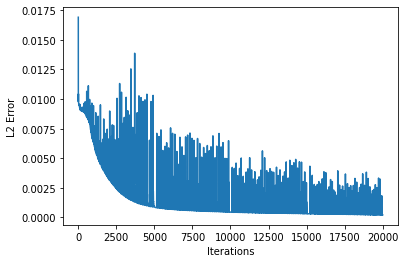

In [ ]:
#Training Loop
optimizer = torch.optim.Adam(npde_net.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5000, gamma=0.9)

it=0
epochs = 20000
loss_list = []

start_time = time.time()
while it < epochs :
    optimizer.zero_grad()

    initial_loss = reconstruction(X_i, Y_i) + initial_velocity(X_i)
    boundary_loss = boundary(X_b)
    domain_loss = pde(X_f)

    loss = initial_loss + boundary_loss + domain_loss   
    loss_list.append(loss.item())
    
    loss.backward()
    optimizer.step()
    scheduler.step()

    it += 1

    print('It: %d, Init: %.3e, Bound: %.3e, Domain: %.3e' % (it, initial_loss.item(), boundary_loss.item(), domain_loss.item()))


train_time = time.time() - start_time
plt.plot(loss_list)
plt.xlabel('Iterations')
plt.ylabel('L2 Error')

In [ ]:
#Getting the trained output. 
if default_device == 'cpu':
    with torch.no_grad():
        u_pred = npde_net(torch_tensor_grad(X_star, default_device)).detach().numpy()

else : 
    with torch.no_grad():
        u_pred = npde_net(torch_tensor_grad(X_star, default_device)).cpu().detach().numpy()
        
l2_error = np.mean((u_actual - u_pred)**2)

print('Training Time: %d seconds, L2 Error: %.3e' % (train_time, l2_error))

u_pred = u_pred.reshape(len(u), grid_length, grid_length)

Training Time: 1247 seconds, L2 Error: 1.110e-04


In [ ]:
!pip install celluloid
from celluloid import Camera
from IPython.display import HTML

def animate(data):
  fig = plt.figure()
  camera = Camera(fig)
  for ii in range(len(data)):
      plt.imshow(data[ii])
      camera.snap()
  animation = camera.animate()

  return animation


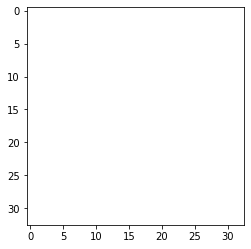

In [ ]:
animation = animate(u_sol)
HTML(animation.to_html5_video())


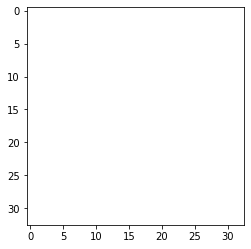

In [ ]:
animation = animate(u_pred.reshape(len(u), grid_length, grid_length))
HTML(animation.to_html5_video())

In [ ]:
from matplotlib import cm
from matplotlib import animation

def animation_plot(name, data):
    wave_name = name
    u_field = data
    xx, yy = np.meshgrid(x,y)


    def update_plot(frame_number, u_field, plot):
        plot[0].remove()
        plot[0] = ax.plot_surface(xx, yy, u_field[frame_number], cmap=cm.coolwarm, linewidth=2, antialiased=False)
        
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    plot = [ax.plot_surface(xx, yy, u_field[0], cmap=cm.coolwarm, linewidth=2, antialiased=False)]
    ax.set_xlim3d(-1.0, 1.0)
    ax.set_ylim3d(-1.0, 1.0)
    ax.set_zlim3d(-0.15, 1)

    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("U")
    ax.set_title(wave_name)

    ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
    ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])

    #plt.tight_layout()
    ax.view_init(elev=30., azim=-110)


    fps = 50 # frame per sec
    frn = len(u_field) # frame number of the animation

    anim = animation.FuncAnimation(fig, update_plot, frn, fargs=(u_field, plot), interval=1000/fps)
    return anim

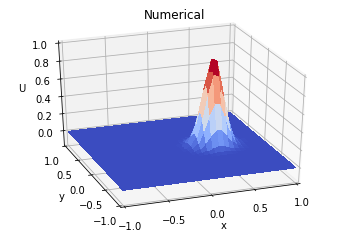

In [ ]:
animate = animation_plot('Numerical', u_sol)
HTML(animate.to_html5_video())

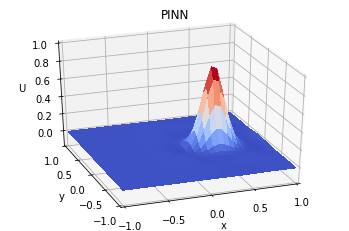

In [ ]:
animate = animation_plot('PINN', u_pred)
HTML(animate.to_html5_video())

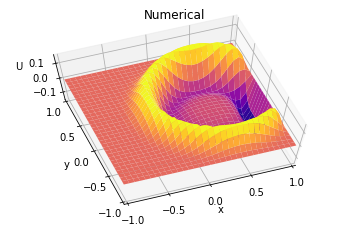

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim3d(-1.0, 1.0)
ax.set_ylim3d(-1.0, 1.0)
ax.set_zlim3d(-0.15, 0.15)
plot = ax.plot_surface(xx, yy, u_sol[100], cmap=cm.plasma, linewidth=2, antialiased=True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("U")
ax.set_title("Numerical")

ax.set_xticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.set_yticks([-1.0, -0.5, 0.0, 0.5, 1.0])
ax.set_zticks([-0.10, 0.0, 0.10])

ax.view_init(elev=70., azim=-110)
